In [52]:
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt
from loguru import logger
import numpy as np
from valleyfloor.process_topography import process_topography
from valleyfloor.utils import setup_wbt

from slopes.subbasins import label_subbasins
from slopes.hillslopes import label_hillslopes
from slopes.network_xsections import network_xsections, observe_values
from slopes.segment_profile import elevation_simplification
from slopes.segment_profile import profile_curvature_peaks
from slopes.segment_profile import mean_shift

logger.enable("valleyfloor")

wbt = setup_wbt("~/opt/WBT/", "../working_dir")

dem = rxr.open_rasterio("../data/input/dem.tif", masked=True).squeeze()
flowlines = gpd.read_file("../data/input/flowlines.shp")
dataset, aligned_flowlines = process_topography(dem, flowlines, wbt)
aligned_flowlines = gpd.GeoSeries(aligned_flowlines['geometry'].values, index=aligned_flowlines['Stream_ID'])

subbasins = label_subbasins(dataset['flow_dir'], dataset['flow_acc'], dataset['flowpaths'], wbt)
hillslopes = label_hillslopes(dataset['flowpaths'], dataset['flow_dir'], subbasins, wbt)
dataset['hillslope'] = hillslopes
dataset['subbasins'] = subbasins

2024-10-17 16:38:04.306 | INFO     | valleyfloor.process_topography:process_topography:36 - process topography
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/slopes-hCrF487D-py3.10/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [21]:
# load in some cross sections
profiles = network_xsections(aligned_flowlines, 20, 100, 2, dataset['subbasins'])
profiles = observe_values(profiles, dataset)

In [22]:
# segment cross sections into regions

In [23]:
# classify first hillslope region

<Axes: >

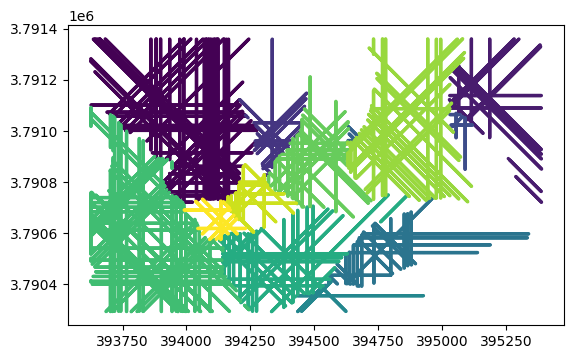

In [24]:
profiles.plot(markersize=2, c=profiles['streamID'])

In [25]:
profiles.to_file('xsections.shp')

/var/folders/l2/9h6xd6f555321vx3s_ttqb_80000gn/T/ipykernel_23095/3700577670.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  profiles.to_file('xsections.shp')
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/slopes-hCrF487D-py3.10/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/slopes-hCrF487D-py3.10/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'conditioned_dem' to 'conditione'
  ogr_write(
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/slopes-hCrF487D-py3.10/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'smoothed_dem' to 'smoothed_d'
  ogr_write(


In [46]:
stream_6 = profiles.loc[profiles['streamID'] == 6]
sample = stream_6.loc[stream_6['xsID'] == 5]

# don't let hand decrease

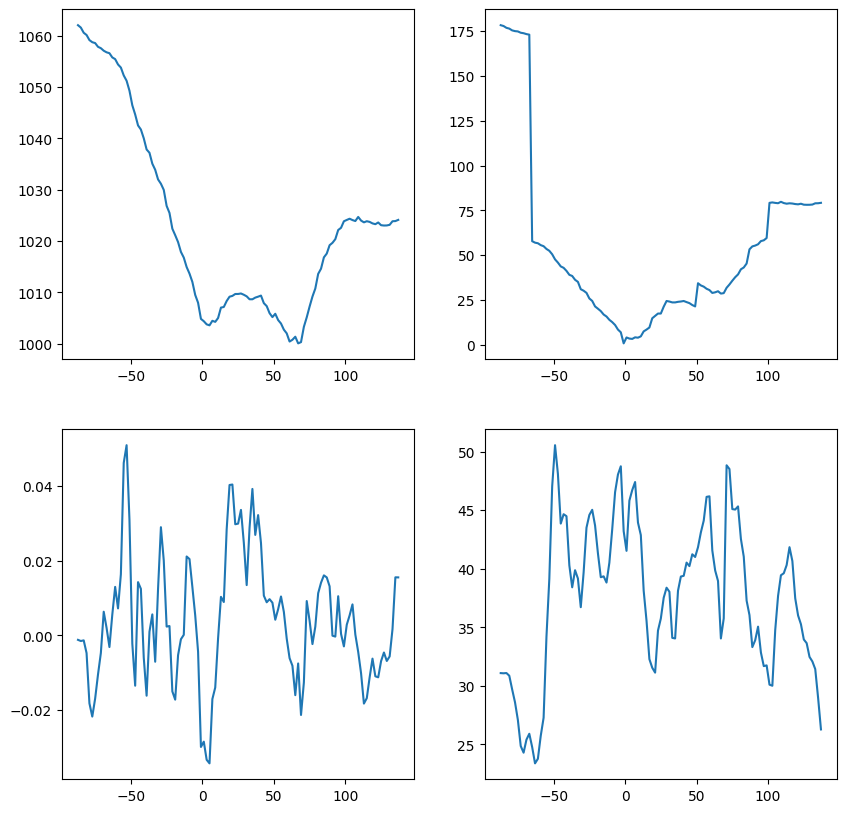

In [80]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes[0,0].plot(sample['alpha'], sample['conditioned_dem'])
axes[0,1].plot(sample['alpha'], sample['hand'])
axes[1,0].plot(sample['alpha'], sample['curvature'])
axes[1,1].plot(sample['alpha'], sample['slope'])


In [56]:
labels, bps = mean_shift(sample['slope'].values)

In [63]:
hillshade= rxr.open_rasterio("../data/extra/hillshade.tif", masked=True)

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

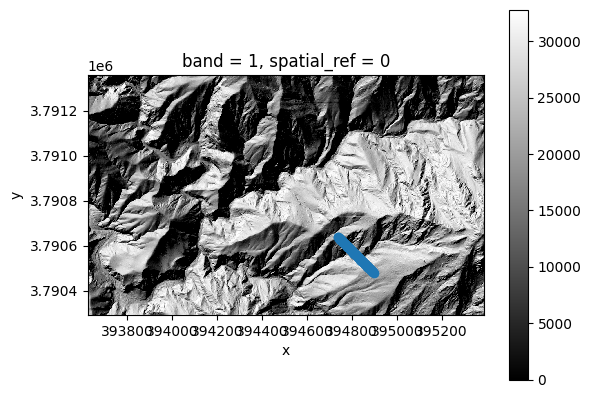

In [64]:
fig, ax = plt.subplots()
hillshade.plot(ax=ax, cmap='grey')
sample.plot(ax=ax)

In [66]:
sample.to_file("sample.shp")

/var/folders/l2/9h6xd6f555321vx3s_ttqb_80000gn/T/ipykernel_23095/1583602749.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sample.to_file("sample.shp")
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/slopes-hCrF487D-py3.10/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/slopes-hCrF487D-py3.10/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'conditioned_dem' to 'conditione'
  ogr_write(
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/slopes-hCrF487D-py3.10/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'smoothed_dem' to 'smoothed_d'
  ogr_write(
